# Stroke Prediction Classifier Models

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This project uses the [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data) in Kaggle to to predict whether a patient is likely to get stroke based on personal information that are used as input features such as gender, age, past diseases, smoking status and the like. This project trains and tests the following 6 models:
- Logistic Regression
- Naive Bayes
- Gaussian Discriminant Analysis (GDA)
- Support Vector Machine
- Decision Tree
- Random Forest

# Preprocessing

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as GDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#### Reading and loading the dataset

In [2]:
file_path = './dataset/healthcare-dataset-stroke-data.csv' 
dataset = pd.read_csv(file_path)
data = dataset.copy()
data.shape

(5110, 12)

#### Cleaning the data 

In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
data.shape

(5110, 12)

#### Encoding Categorical Variables

In [7]:
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 

#### Scaling Numerical Features

In [8]:
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [9]:
X = data.drop(columns=['id', 'stroke'])
Y = data['stroke']


# Split into train (70%), test (20%), and validation (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Visualize the Data - Categorical Features

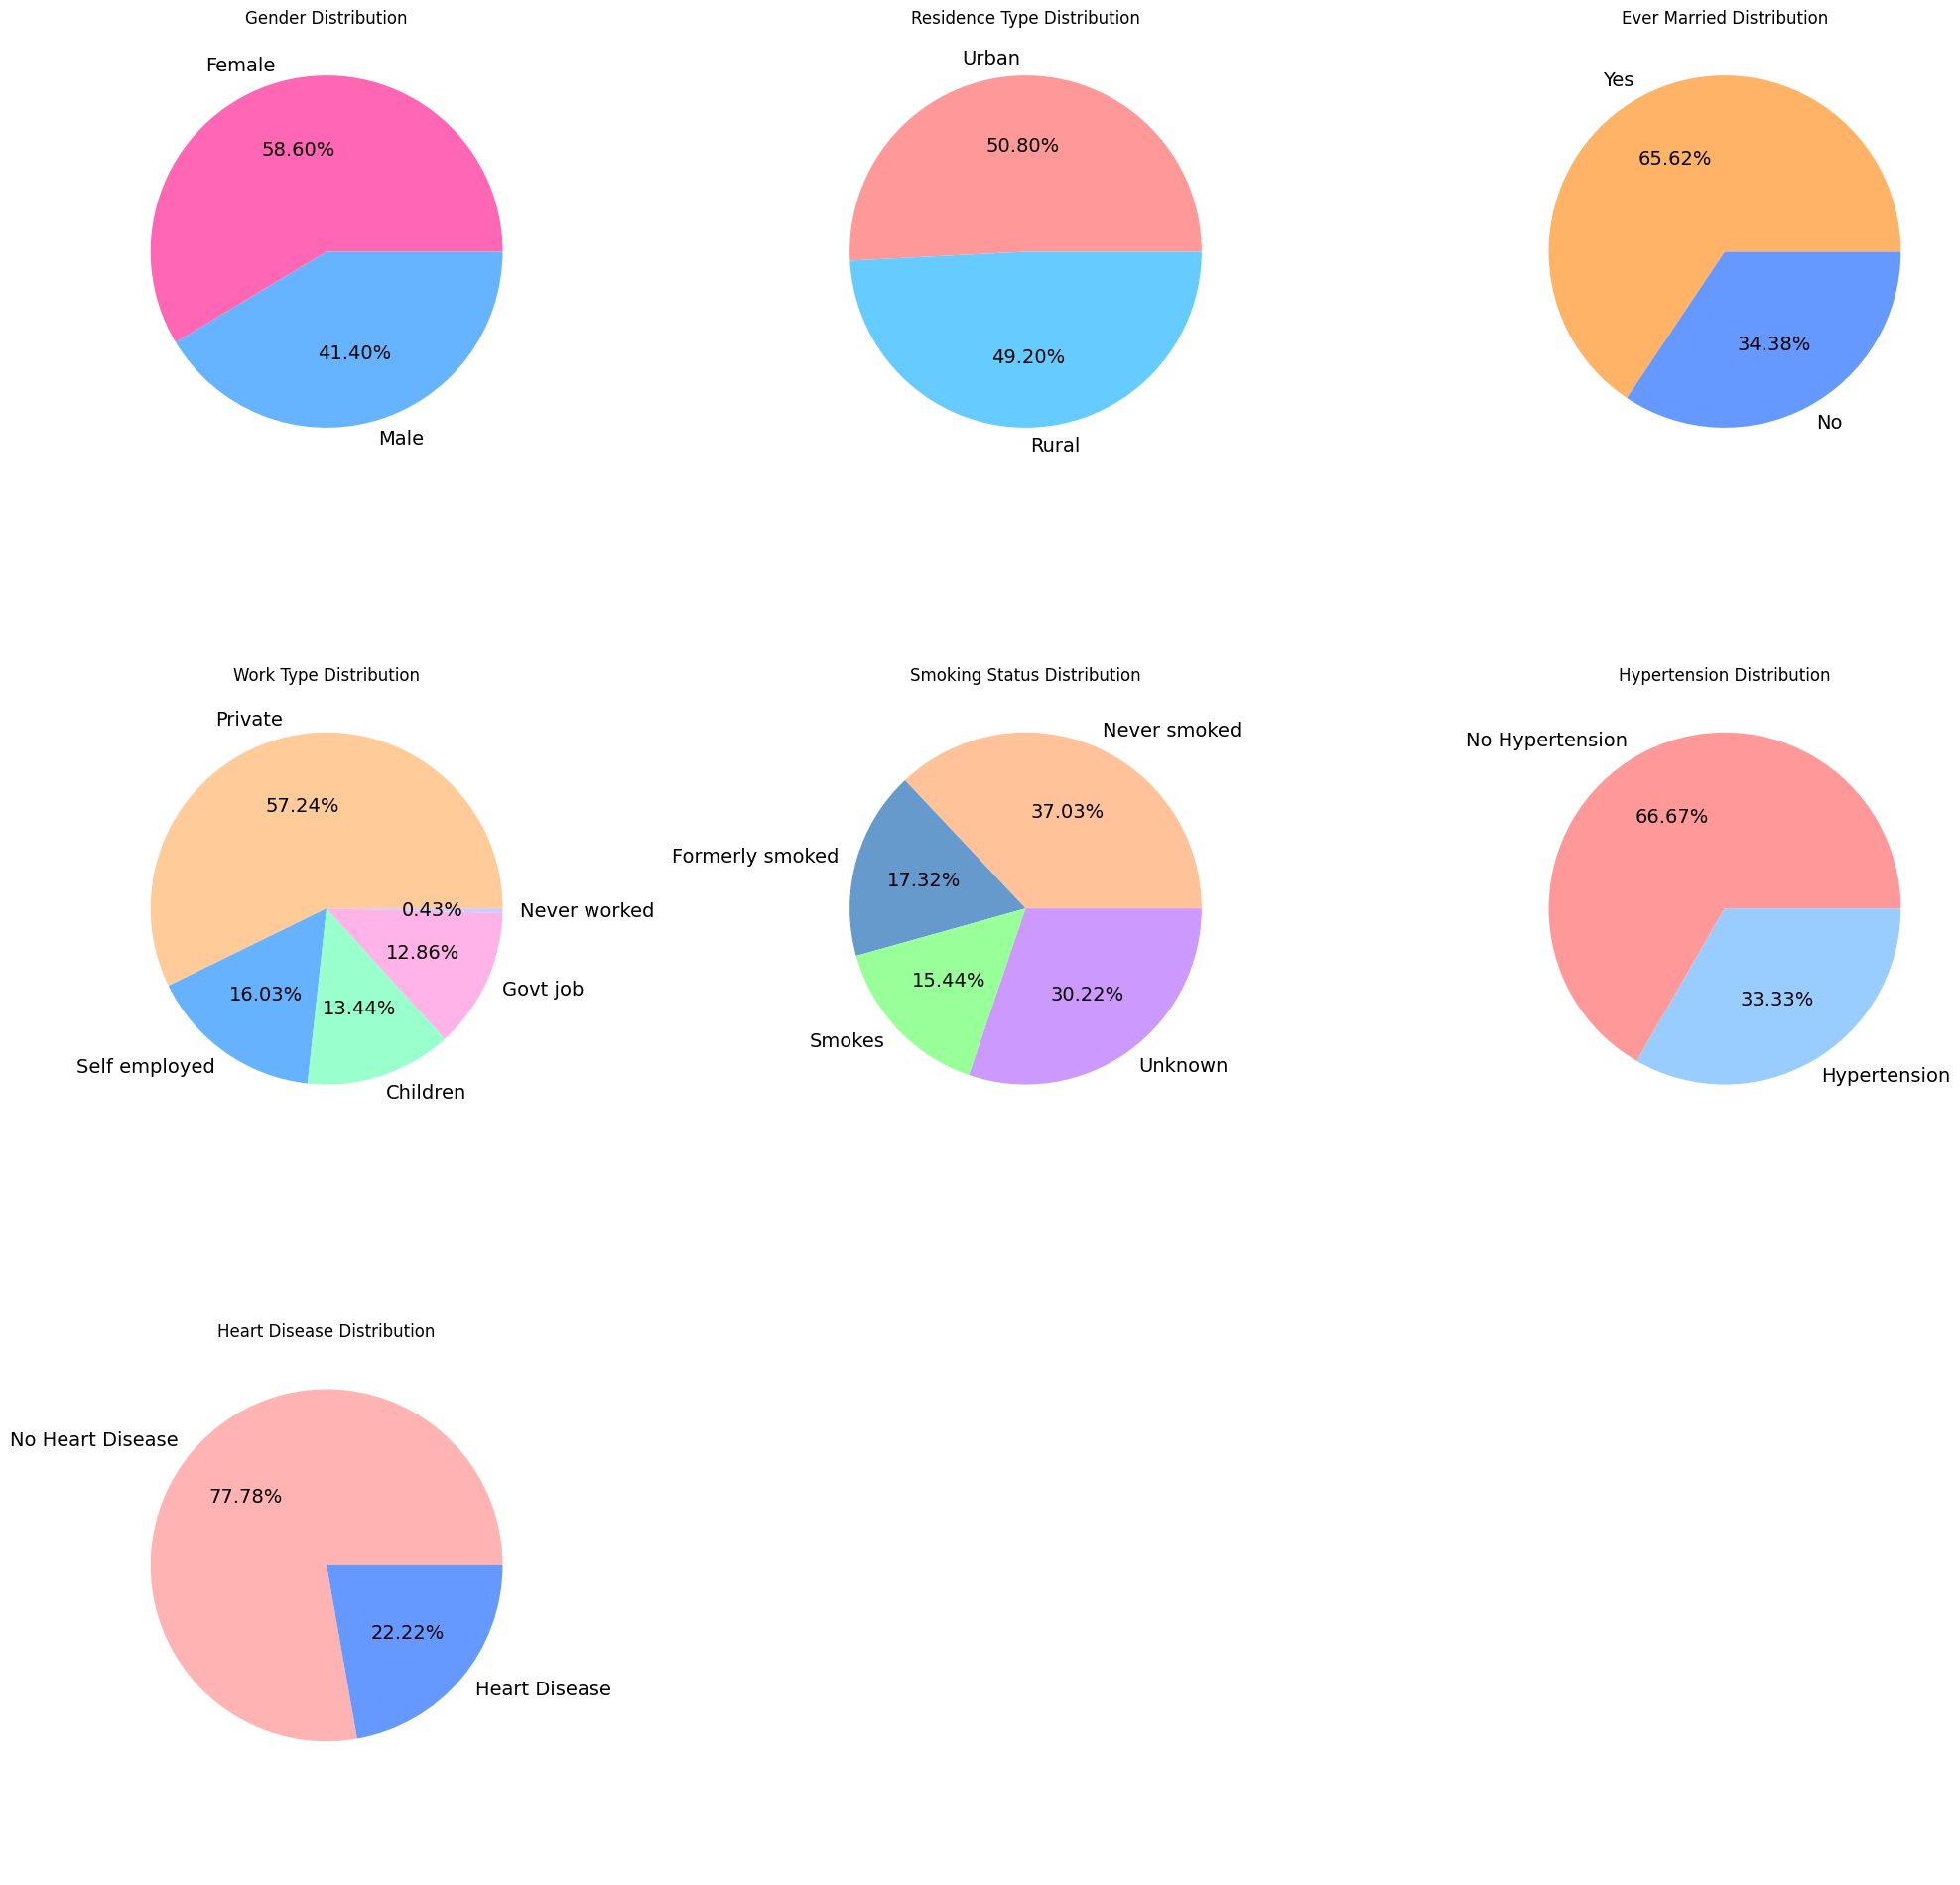

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))

# Gender Distribution
temp_gender = [2994, 2115]
labels_gender = ['Female', 'Male']
colors_gender = ['#ff66b3', '#66b3ff']
axs[0, 0].pie(temp_gender, labels=labels_gender, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_gender)
axs[0, 0].set_title('Gender Distribution')

# Hypertension Distribution
temp_hypertension = [3000, 1500]
labels_hypertension = ['No Hypertension', 'Hypertension']
colors_hypertension = ['#ff9999', '#99ccff']
axs[1, 2].pie(temp_hypertension, labels=labels_hypertension, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_hypertension)
axs[1, 2].set_title('Hypertension Distribution')

# Heart Disease Distribution
temp_heart_disease = [3500, 1000]
labels_heart_disease = ['No Heart Disease', 'Heart Disease']
colors_heart_disease = ['#ffb3b3', '#6699ff']
axs[2, 0].pie(temp_heart_disease, labels=labels_heart_disease, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_heart_disease)
axs[2, 0].set_title('Heart Disease Distribution')

# Ever Married Distribution
temp_ever_married = [3353, 1757]
labels_ever_married = ['Yes', 'No']
colors_ever_married = ['#ffb366', '#6699ff']
axs[0, 2].pie(temp_ever_married, labels=labels_ever_married, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_ever_married)
axs[0, 2].set_title('Ever Married Distribution')

# Work Type Distribution
temp_work_type = [2925, 819, 687, 657, 22]
labels_work_type = ['Private', 'Self employed', 'Children', 'Govt job', 'Never worked']
colors_work_type = ['#ffcc99', '#66b2ff', '#99ffcc', '#ffb3e6', '#ccccff']
axs[1, 0].pie(temp_work_type, labels=labels_work_type, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_work_type)
axs[1, 0].set_title('Work Type Distribution')

# Residence Type Distribution
temp_residence = [2596, 2514]
labels_residence = ['Urban', 'Rural']
colors_residence = ['#ff9999', '#66ccff']
axs[0, 1].pie(temp_residence, labels=labels_residence, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_residence)
axs[0, 1].set_title('Residence Type Distribution')

# Smoking Status Distribution
temp_smoking_status = [1892, 885, 789, 1544]
labels_smoking_status = ['Never smoked', 'Formerly smoked', 'Smokes', 'Unknown']
colors_smoking_status = ['#ffc299', '#6699cc', '#99ff99', '#cc99ff']
axs[1, 1].pie(temp_smoking_status, labels=labels_smoking_status, autopct='%1.2f%%', textprops={"fontsize":14}, colors=colors_smoking_status)
axs[1, 1].set_title('Smoking Status Distribution')

axs[2, 1].axis('off')
axs[2, 2].axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()

plt.show()

#### Visualize the Data - Numerical Features

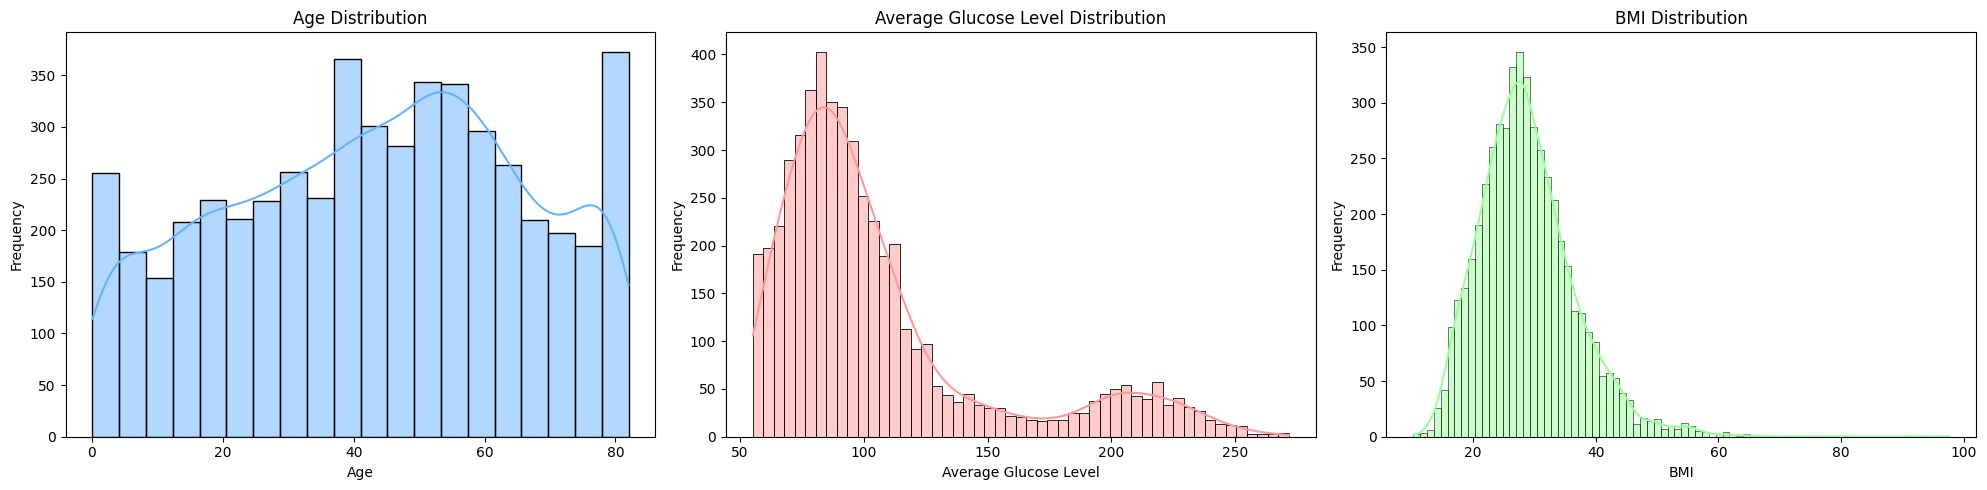

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Age Distribution
sns.histplot(dataset['age'], kde=True, color='#66b3ff', ax=axs[0])
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Average Glucose Level Distribution
sns.histplot(dataset['avg_glucose_level'], kde=True, color='#ff9999', ax=axs[1])
axs[1].set_title('Average Glucose Level Distribution')
axs[1].set_xlabel('Average Glucose Level')
axs[1].set_ylabel('Frequency')

# BMI Distribution
sns.histplot(dataset['bmi'], kde=True, color='#99ff99', ax=axs[2])
axs[2].set_title('BMI Distribution')
axs[2].set_xlabel('BMI')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Training the Models

### 1. Logistic Regression

In [ ]:
# Training with Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_resampled, y_resampled)

# Evaluating on Test Set
y_pred_test = lr_model.predict(X_test)
print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

### 2. Gaussian Discriminant Analysis GDA

In [ ]:
# Train Gaussian Discriminant Analysis (GDA)
gda_model = GDA()  
gda_model.fit(X_resampled, y_resampled) 

# Evaluate on Test Set
y_pred_test = gda_model.predict(X_test)  
print("Gaussian Discriminant Analysis (GDA)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

### 3. Naive Bayes

In [ ]:
# Train Naive Bayes
nb_model = GaussianNB()  
nb_model.fit(X_resampled, y_resampled)  

# Evaluate on Test Set
y_pred_test = nb_model.predict(X_test) 
print("Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

### 4. Support Vector Machine 

In [ ]:
# Training with SVM
svm_model = SVC(random_state=42, kernel='linear', probability=True)
svm_model.fit(X_resampled, y_resampled)

# Evaluating on Test Set
y_pred_test = svm_model.predict(X_test)
print("Support Vector Machine")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

### 5. Decision Tree

In [ ]:
# Training with Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_resampled, y_resampled)

# Evaluating with Test Set
y_pred_test = dt_model.predict(X_test)
print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

### 6. Random Forest

In [ ]:
# Training with Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

# Evaluating on Test Set
y_pred_test = rf_model.predict(X_test)
print("Random Forest")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

## Comparing the algorithms used

In [ ]:
results = {
    "Algorithm": [],
    "Accuracy": [],
    "Precision (macro)": [],
    "Recall (macro)": [],
    "F1-score (macro)": []
}


def evaluate_model(model, algorithm_name, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    results["Algorithm"].append(algorithm_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision (macro)"].append(report["macro avg"]["precision"])
    results["Recall (macro)"].append(report["macro avg"]["recall"])
    results["F1-score (macro)"].append(report["macro avg"]["f1-score"])

# Evaluate pre-trained models
evaluate_model(lr_model, "Logistic Regression", X_test, y_test)
evaluate_model(nb_model, "Naive Bayes", X_test, y_test)
evaluate_model(gda_model, "Gaussian Discriminant Analysis(GDA)", X_test, y_test)
evaluate_model(svm_model, "Support Vector Machine", X_test, y_test)
evaluate_model(dt_model, "Decision Tree", X_test, y_test)
evaluate_model(rf_model, "Random Forest", X_test, y_test)

# Tabulate Results
results_df = pd.DataFrame(results)
results_df